<a href="https://colab.research.google.com/github/VarunMadhav/StockPredict/blob/master/newstockthree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib scikit-learn tensorflow keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('BPCL.NS.csv')


In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-21,395.500000,397.350006,368.299988,374.450012,276.966064,8378443
1,2019-05-22,378.000000,388.899994,376.000000,384.250000,284.214783,7762830
2,2019-05-23,389.899994,411.450012,382.000000,384.350006,284.288757,12958801
3,2019-05-24,395.000000,398.899994,386.799988,395.450012,292.498993,9903134
4,2019-05-27,393.000000,403.850006,388.850006,402.000000,297.343781,5111371
...,...,...,...,...,...,...,...
1231,2024-05-14,612.400024,617.700012,602.150024,605.950012,605.950012,6406657
1232,2024-05-15,609.000000,628.000000,607.049988,625.049988,625.049988,9417506
1233,2024-05-16,632.000000,633.349976,611.049988,618.750000,618.750000,13443468
1234,2024-05-17,619.700012,629.500000,618.349976,628.299988,628.299988,5101693


In [5]:
df1 = df.reset_index()['Close']

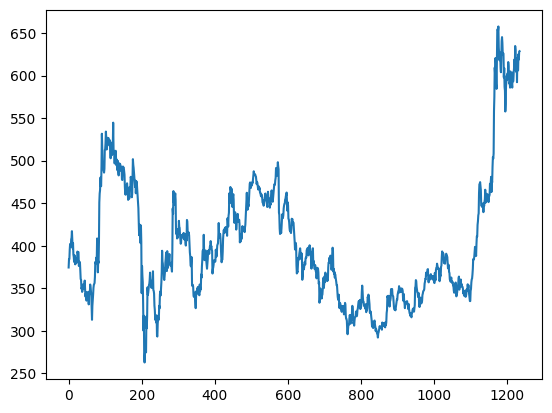

In [6]:
plt.plot(df1)
plt.show()

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [9]:
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [10]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
11/11 [==============================] - 12s 488ms/step - loss: 0.0519 - val_loss: 0.0178
Epoch 2/100
11/11 [==============================] - 2s 176ms/step - loss: 0.0118 - val_loss: 0.0182
Epoch 3/100
11/11 [==============================] - 2s 174ms/step - loss: 0.0072 - val_loss: 0.0171
Epoch 4/100
11/11 [==============================] - 3s 265ms/step - loss: 0.0059 - val_loss: 0.0110
Epoch 5/100
11/11 [==============================] - 2s 208ms/step - loss: 0.0050 - val_loss: 0.0104
Epoch 6/100
11/11 [==============================] - 2s 174ms/step - loss: 0.0044 - val_loss: 0.0070
Epoch 7/100
11/11 [==============================] - 2s 171ms/step - loss: 0.0041 - val_loss: 0.0063
Epoch 8/100
11/11 [==============================] - 2s 173ms/step - loss: 0.0039 - val_loss: 0.0053
Epoch 9/100
11/11 [==============================] - 2s 172ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 10/100
11/11 [==============================] - 2s 223ms/step - loss: 0.0036 - val_l

In [14]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

11/11 [==============================] - 0s 34ms/step


In [15]:
print(f"Train RMSE: {math.sqrt(mean_squared_error(y_train, train_predict))}")
print(f"Test RMSE: {math.sqrt(mean_squared_error(ytest, test_predict))}")

Train RMSE: 407.3903398194486
Test RMSE: 429.6188616358916


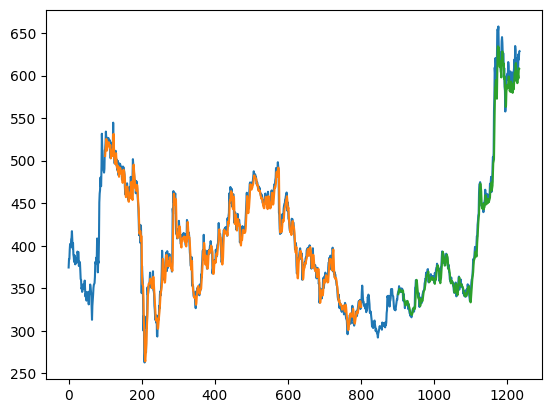

In [16]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [17]:
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])

lst_output = []
n_steps = time_step
i = 0
while i < 200:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

In [18]:
predicted_value_after_200_days = scaler.inverse_transform(np.array(lst_output[-1]).reshape(-1, 1))

In [19]:
print(f"Predicted stock closing value after 200 days: {predicted_value_after_200_days[0][0]}")

Predicted stock closing value after 200 days: 332.5253962755418
